In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('mushroom.csv')

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


#EDA

In [4]:
df.describe()  # basic description of the dataset

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
df.shape #2000 rows and 26 column

(2000, 26)

In [7]:
## check for missing values

In [8]:
df.isna().sum()


,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [9]:
# there aer no missing values in this datasset


##visualization

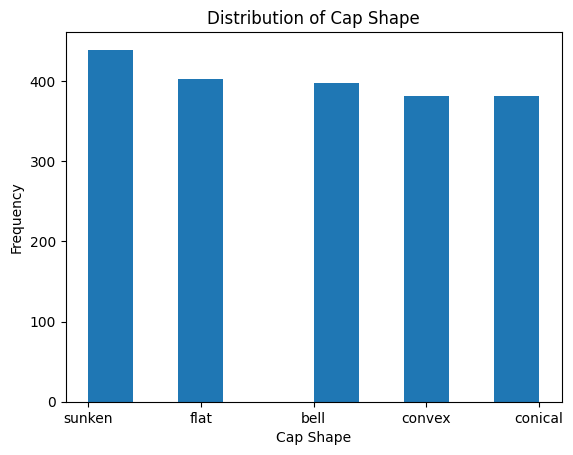

In [11]:
import matplotlib.pyplot as plt
                                                    ## histogram
plt.hist(df['cap_shape'], bins=10)
plt.xlabel('Cap Shape')
plt.ylabel('Frequency')
plt.title('Distribution of Cap Shape')
plt.show()

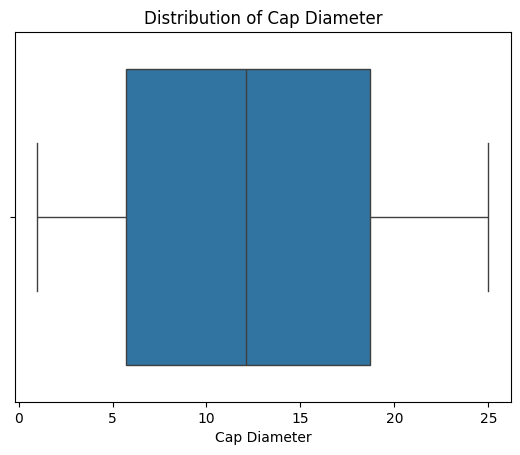

In [14]:
import seaborn as sns

sns.boxplot(x=df['cap_diameter'])
plt.xlabel('Cap Diameter')               ## histogram
plt.title('Distribution of Cap Diameter')
plt.show()

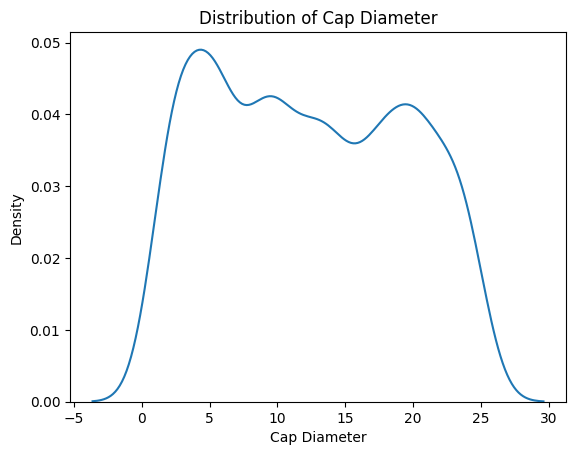

In [15]:
# density plot

import seaborn as sns

sns.kdeplot(x=df['cap_diameter'])
plt.xlabel('Cap Diameter')
plt.ylabel('Density')
plt.title('Distribution of Cap Diameter')
plt.show()

##correlation

In [16]:
#!pip install researchpy==0.3.2


In [17]:
import researchpy as rp

# Calculate Cramer's V for all pairs of features
categorical_features = df.select_dtypes(include=['object']).columns
correlation_matrix = rp.crosstab(df[categorical_features[0]], df[categorical_features[1]], test='chi-square')

# Print the correlation matrix
print(correlation_matrix)

# I hv creqated contingency table
# lets understand it -
#pearson chi-square - 29.9632 indicated difference btw observed freq nd expected freq.
# p- value  - 0.0028. A low p-value (typically below 0.05) suggests that there is a statistically significant association between the features.

(            cap_surface                           
cap_surface     fibrous grooves scaly smooth   All
cap_shape                                         
bell                 80      92   124    101   397
conical              93      98   107     83   381
convex              107      65    96    113   381
flat                 88     106   106    102   402
sunken              114      76   135    114   439
All                 482     437   568    513  2000,                  Chi-square test  results
0  Pearson Chi-square ( 12.0) =   29.9632
1                     p-value =    0.0028
2                  Cramer's V =    0.0707)


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 12.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


#Data Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder
## aaplying label encoding to convert categorical variable into numerical
# Select categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Print the updated DataFrame
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [25]:
# removing colum named unnamed1

df = df.drop('Unnamed: 0', axis=1)

In [26]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,11.092703,8.423199


# Data Visualization

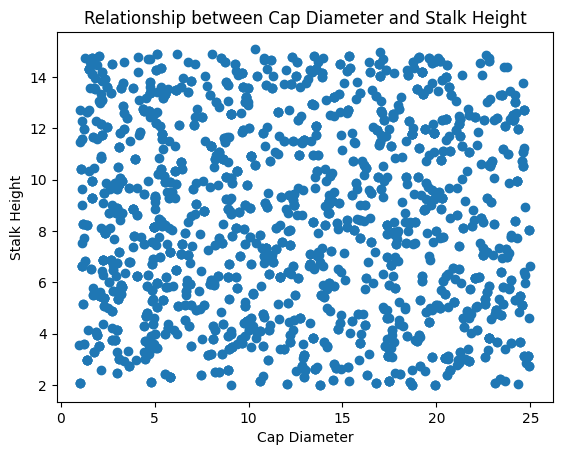

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df['cap_diameter'], df['stalk_height'])  # right now we are not able to understand anything
plt.xlabel('Cap Diameter')
plt.ylabel('Stalk Height')
plt.title('Relationship between Cap Diameter and Stalk Height')
plt.show()

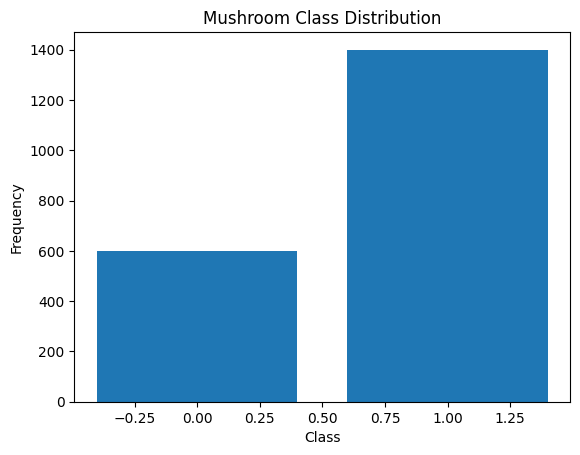

In [33]:
import matplotlib.pyplot as plt

# Count the frequency of each class
class_counts = df['class'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Mushroom Class Distribution')
plt.show()

#SVM implementation

In [37]:
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [38]:
X = df.drop('class', axis=1)
y = df['class']  # Replace with your target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [39]:
# Create an SVM classifier object
svm_classifier = SVC(kernel='linear')

# Train the classifier using the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
# Predict the classes for the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1-score: 0.800599700149925


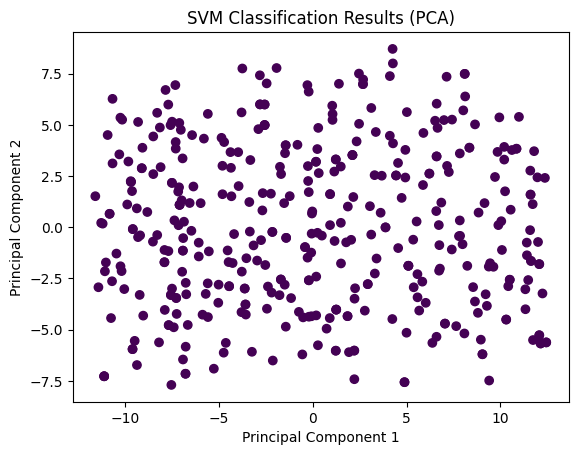

In [50]:


# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Plot the data points colored by predicted class
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification Results (PCA)')
plt.show()

# parameter tuning and optimization

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 5],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_svm_classifier = grid_search.best_estimator_


Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}


Wehv got the best hypermaters it looks like we have already used this parameter for building model hence no change in accuracy even after tuning

In [53]:
# Predict using the best model
y_pred = best_svm_classifier.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy)

Accuracy with best hyperparameters: 0.6675


# Comparison and Analysis

In [54]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")

Kernel: linear, Accuracy: 0.6675
Kernel: poly, Accuracy: 0.6925
Kernel: rbf, Accuracy: 0.6675


## Analyze svm strength and weakness

Strengths:

High accuracy: SVM often achieves high accuracy on the Mushroom dataset due to its ability to find effective decision boundaries.

Handling categorical data: SVM works well with categorical data, which is a significant part of the Mushroom dataset.

Weaknesses:

Computational cost: Training SVM, especially with large datasets or complex kernels, can be computationally intensive.

##Discussing Practical Implications of SVM in Real-World Classification Tasks

Image recognition: Identifying objects or patterns in images.

Text classification: Categorizing documents or emails into different topics.

Bioinformatics: Predicting protein structures or classifying gene expressions.